In [1]:
import scanpy as sc
import anndata as ad

In [2]:
adata_raw = ad.read_h5ad("../../data/sciplex/sciplex3_uce_adata.h5ad")

In [3]:
adata_pp = ad.read_h5ad("../../data/sciplex/sciplex_preprocessed.h5ad")

In [15]:
tumour_apc_sig = [
    "PIK3CD", "MIIP", "EFHD2", "ALDH4A1", "FUCA1", "ZDHHC18", "STX12", "THEMIS2", "LAPTM5", "MYCL",
    "PPT1", "CFAP57", "ELOVL1", "ATP6V0B", "EFCAB14", "YIPF1", "CTH", "SLC44A5", "MCOLN2", "GTF2B",
    "DIPK1A", "ELAPOR1", "KCNC4", "CD53", "CTTNBP2NL", "PPM1J", "LINC01356", "ATP1A1", "NOTCH2", "TXNIP",
    "NBPF14", "PLEKHO1", "C1orf54", "MCL1", "ENSA", "CTSS", "SCNM1", "S100A9", "IL6R", "IFI16",
    "SLAMF8", "SLAMF9", "ATP1A2", "CD84", "CD48", "SLAMF7", "F11R", "FCGR2A", "FCGR2B", "GPA33",
    "SFT2D2", "TBX19", "SELL", "TNFSF18", "KLHL20", "KIAA0040", "COP1", "IER5", "NIBAN1", "DENND1B",
    "PTPRC", "PLEKHA6", "CDK18", "RAB29", "RAB7B", "RASSF5", "CD55", "LPGAT1", "BATF3", "GPR137B",
    "ERO1B", "ZNF124", "NLRP3", "ZNF672", "ID2", "GRHL1", "ITSN2", "YPEL5", "NLRC4", "RASGRP3",
    "MAP4K3", "EML4-AS1", "EML4", "CCDC88A", "PELI1", "AFTPH", "PLEK", "MXD1", "NAGK", "DYSF",
    "VAMP8", "TMEM150A", "CNNM4", "MGAT4A", "RNF149", "IL18R1", "BCL2L11", "MYO7B", "HNMT", "SPOPL",
    "TANK", "GCA", "CERS6", "DHRS9", "WIPF1", "NFE2L2", "CAVIN2", "ANKRD44", "CFLAR", "CASP10",
    "GPR1", "CCNYL1", "PLEKHM3", "TMEM169", "CXCR2", "ARPC2", "TMBIM1", "CNPPD1", "SP110", "INPP5D",
    "LMCD1", "MTMR14", "GRIP2", "SH3BP5", "RAB5A", "KAT2B", "MYD88", "CTNNB1", "SPINK8", "DNASE1L3",
    "CRYBG3", "GABRR3", "BTLA", "ATP6V1A", "B4GALT4", "ARHGAP31", "CD80", "PLA1A", "HCLS1", "PARP14",
    "OSBPL11", "MBD4", "ACP3", "PLSCR1", "RNF13", "MFSD1", "TNFSF10", "KLHL6", "MAGEF1", "MAP3K13",
    "BCL6", "CLDN1", "RUBCN", "SH3BP2", "LAP3", "SEL1L3", "RBPJ", "KLF3", "TLR1", "TLR6",
    "KLHL5", "RBM47", "PARM1", "NAAA", "SEPTIN11", "CDS1", "AFF1", "HERC3", "GPRIN3", "DAPP1",
    "TET2", "CAMK2D", "SEC24D", "USP53", "ANXA5", "FBXW7", "FNIP2", "IRF2", "OTULINL", "FYB1",
    "ZSWIM6", "CD180", "NAIP", "ZNF366", "IQGAP2", "ARSB", "GLRX", "ERAP1", "TRIM36", "FEM1C",
    "SNX2", "MARCHF3", "IRF1", "CD74", "CCDC69", "GM2A", "CNOT8", "IL12B", "LCP2", "ATP6V0E1",
    "CREBRF", "DBN1", "PHYKPL", "MGAT1", "SERPINB1", "NEDD9", "GMPR", "ATXN1", "TPMT", "KDM1B",
    "TRIM38", "BTN2A2", "HLA-F", "HLA-E", "PPP1R18", "HLA-C", "HLA-B", "LST1", "AIF1", "GPSM3",
    "HLA-DRA", "HLA-DRB5", "HLA-DRB1", "HLA-DQA1", "HLA-DQB1", "HLA-DMB", "HLA-DMA", "HLA-DPA1", "HLA-DPB1", "RGL2",
    "TAPBP", "FGD2", "TREML2", "TRERF1", "NFKBIE", "TNFRSF21", "PAQR8", "FAM135A", "AKIRIN2", "UBE2J1",
    "CD164", "FYN", "HDAC2-AS2", "DSE", "MAN1A1", "NCOA7", "STX7", "VNN2", "SGK1", "LINC01010",
    "MAP3K5", "WAKMAR2", "TNFAIP3", "HECA", "CITED2", "RAB32", "PPP1R14C", "RNASET2", "SNX13", "CCDC126",
    "SKAP2", "CPVL", "DBNL", "IKZF1", "GUSB", "TPST1", "NCF1", "TMEM243", "SAMD9L", "AGFG2"
]

In [4]:
sm_emb_dict = dict()

for sm in adata_pp.obs['product_name'].unique():
    ad_subset = adata_pp[adata_pp.obs['product_name'] == sm]
    emb = list(set(list(ad_subset.obs['sm_embedding'])))
    assert len(emb) == 1

    sm_emb_dict[sm] = emb
    

In [5]:
sm_emb_list = list()
for compound in adata_raw.obs['product_name']:
    if compound in sm_emb_dict.keys():
        sm_emb_list.append(sm_emb_dict[compound])
    else:
        sm_emb_list.append("NO_EMBEDDING")


    

In [6]:
len(sm_emb_list)

581766

In [7]:
adata_raw.obs['sm_embedding'] = sm_emb_list
adata_raw = adata_raw[adata_raw.obs['sm_embedding'] != "NO_EMBEDDING"]

In [8]:
adata_raw

View of AnnData object with n_obs × n_vars = 571895 × 17376
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_genes', 'sm_embedding'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells'
    obsm: 'X_uce'

In [9]:
sc.pp.filter_cells(adata_raw, min_genes=100)
sc.pp.filter_genes(adata_raw, min_cells=10)

/apps/miniconda3/envs/dege-fm-distance/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [32]:
adata_raw

AnnData object with n_obs × n_vars = 571696 × 17371
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_genes', 'sm_embedding'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_uce'

In [11]:
sc.pp.normalize_total(adata_raw)
sc.pp.log1p(adata_raw)

In [36]:
results = dict()

for n_genes_hvar in range(1000, 7500, 500):
    print(n_genes_hvar)
    sc.pp.highly_variable_genes(adata_raw, n_top_genes=n_genes_hvar)
    adata_hvg = adata_raw[:, adata_raw.var['highly_variable']]
    
    i = 0
    for gene in tumour_apc_sig:
        if gene in list(adata_hvg.var_names):
            i+=1

    results[n_genes_hvar] = i
    

1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [37]:
results

{1000: 29,
 1500: 42,
 2000: 55,
 2500: 71,
 3000: 77,
 3500: 83,
 4000: 88,
 4500: 93,
 5000: 104,
 5500: 111,
 6000: 116,
 6500: 125,
 7000: 127}

In [22]:
adata_hvg_5000 = adata_raw[:, adata_raw.var['highly_variable']]

In [23]:
adata_hvg_5000

View of AnnData object with n_obs × n_vars = 571696 × 2000
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_genes', 'sm_embedding'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_uce'

In [35]:
i = 0
for gene in tumour_apc_sig:
    if gene in list(adata_hvg_5000.var_names):
        i+=1

print(i)

print(len(tumour_apc_sig))

55
270


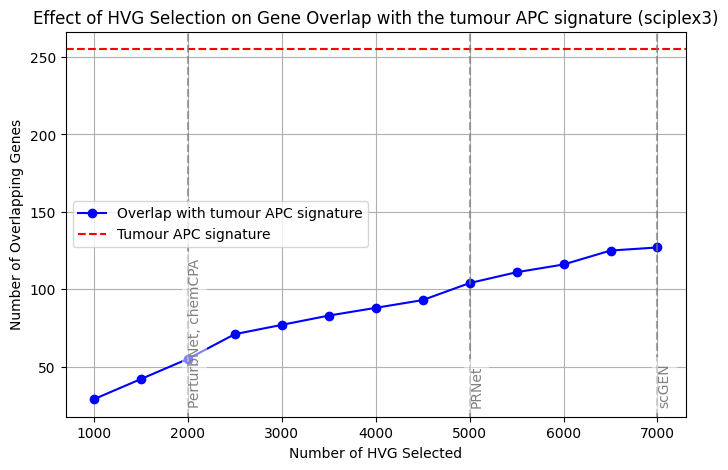

In [46]:
import matplotlib.pyplot as plt

# Data
hvg_dict = {
    1000: 29, 1500: 42, 2000: 55, 2500: 71, 3000: 77, 3500: 83, 4000: 88, 
    4500: 93, 5000: 104, 5500: 111, 6000: 116, 6500: 125, 7000: 127
}
total_genes = 255  # Total number of genes in your list

# Extract keys and values
hvg_counts = list(hvg_dict.keys())
overlap_counts = list(hvg_dict.values())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(hvg_counts, overlap_counts, marker='o', linestyle='-', color='b', label='Overlap with tumour APC signature')
plt.axhline(y=total_genes, color='r', linestyle='--', label='Tumour APC signature')


important_hvg = {2000: "PerturbNet, chemCPA", 5000: "PRNet", 7000: "scGEN"}
for hvg in important_hvg.keys():
    plt.axvline(x=hvg, color='gray', linestyle='--', alpha=0.7)
    y_position = min(overlap_counts) - 5
    #plt.text(hvg, 10, important_hvg[hvg], rotation=90, fontsize=10, color='gray')
    plt.text(hvg, y_position, important_hvg[hvg], rotation=90, verticalalignment='bottom', 
             fontsize=10, color='gray', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))



# Labels and title
plt.xlabel('Number of HVG Selected')
plt.ylabel('Number of Overlapping Genes')
plt.title('Effect of HVG Selection on Gene Overlap with the tumour APC signature (sciplex3)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
#scGEN -> 7000
#PRNet -> 5000
#PerturbNet, chemCPA -> 2000


In [24]:
adata_raw.write_h5ad("../../data/sciplex/sciplex3_final.h5ad")

TypeError: Can't implicitly convert non-string objects to strings